<a href="https://colab.research.google.com/github/ShyamSundhar1411/My-ML-Notebooks/blob/master/ML%20Algorithms/Linear_Regression_with_jax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import jax.numpy as jnp
from jax import random
from jax import grad,jit
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import pandas as pd

In [79]:
X,y = make_regression(n_samples=400,n_features=1,noise=5)

In [80]:
# X = (X-X.mean())/X.std()

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [87]:
def plot_linear_regression(X_train,y_train,X_test,y_preds,title="Linear Regression"):
  plt.figure()
  plt.scatter(X_train,y_train)
  plt.plot(X_test,y_preds,color = "red")
  plt.title(title)
  plt.show()

# Closed Form Solution

## Functional Implementation

In [4]:
def normalize(x):
  return (x-x.mean())/x.std()

In [5]:
normalize_jit = jit(normalize)

In [6]:
X = normalize_jit(X)

In [8]:
X_train.shape,y_train.shape

((320, 1), (320,))

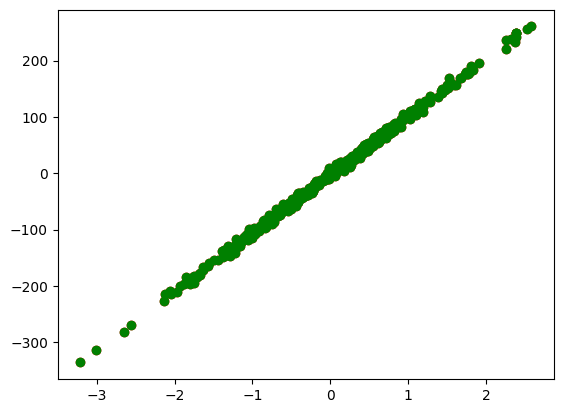

In [9]:
plt.scatter(X[:,0], y, c='r')
plt.scatter(X[:,1], y, c='g')
plt.show()

In [16]:
def get_closed_form(X,y):
  p1 = jnp.dot(X.T,X)
  p2 = jnp.dot(X.T,y)
  return jnp.dot(jnp.linalg.pinv(p1),p2)


In [20]:
theta = get_closed_form(X_train,y_train)

In [21]:
theta

Array([103.445724], dtype=float32)

In [23]:
def predict(X,theta):
  return jnp.dot(X,theta)

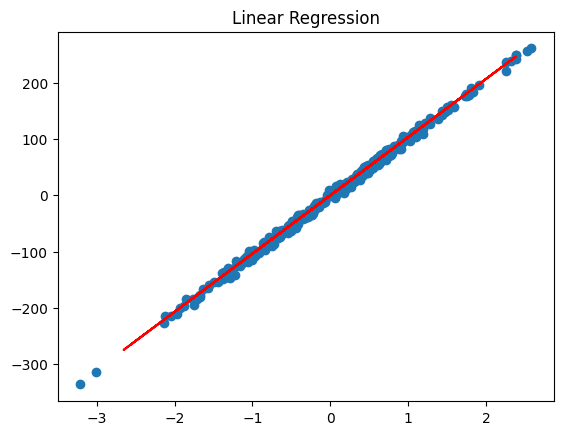

In [24]:
plt.figure()
plt.scatter(X_train,y_train)
plt.plot(X_test,predict(X_test,theta),color = "red")
plt.title("Linear Regression")
plt.show()

## Class Based Implementation

In [82]:
class LinearRegression:
  def get_theta(self):
    theta = jnp.dot(jnp.linalg.pinv(jnp.dot(self.X.T,self.X)),jnp.dot(self.X.T,self.y))
    return theta
  def fit(self,X,y):
    self.X = X
    self.y = y
    self.theta = self.get_theta()
  def predict(self,X):
    return jnp.dot(X,self.theta)


In [83]:
reg_model = LinearRegression()

In [84]:
reg_model.fit(X_train,y_train)

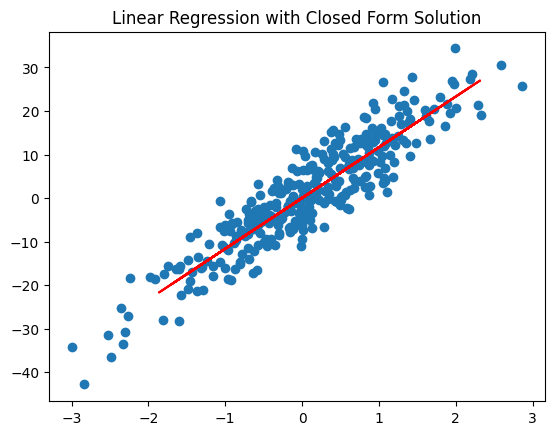

In [88]:
plot_linear_regression(X_train,y_train,X_test,reg_model.predict(X_test),title="Linear Regression with Closed Form Solution")